In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy import squeeze

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


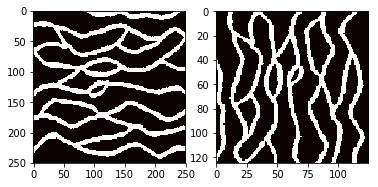

In [9]:
# TI1: Strebelle
TI1, TI_filename1 = mps.trainingimages.strebelle(di=1)
TI1=np.swapaxes(TI1,0,1)
# TI1: Strebelle, rotated and coarsened
TI2, TI_filename2 = mps.trainingimages.strebelle(di=2)
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(TI1[:,:,0])
plt.subplot(1,2,2)
plt.imshow(TI2[:,:,0])
plt.show()

In [10]:
#%% MPS_SNESIM_TREE
grid_size = np.array([350, 200, 1])
O = mps.mpslib(method='mps_snesim_tree',
                    n_real = 1, verbose_level=-1)
#O = mps.mpslib(method='mps_genesim',
#                    n_real = 1, verbose_level=-1)
O.par['debug_level']=-1
O.par['n_cond']=49
O.par['simulation_grid_size']=grid_size

# make sure no unwanted hard/soft data files are being used 
O.delete_local_files()


Using MPSlib installed in /mnt/space/PROGRAMMING/mpslib (from /mnt/space/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


In [11]:
d_mask1=np.zeros([grid_size[0],grid_size[1],grid_size[2]])
d_mask1[80:150,100:180]=1;
d_mask1[0:40,80:150,]=1;
d_mask2=1-d_mask1;
mask_fnam1='mask_01.dat'
mask_fnam2='mask_02.dat'
mps.eas.write_mat(d_mask1,mask_fnam1)
mps.eas.write_mat(d_mask2,mask_fnam2)

{'dim': {'nx': 350, 'ny': 200, 'nz': 1},
 'n_cols': 1,
 'title': '350 200 1',
 'header': ['Header'],
 'D': array([1., 1., 1., ..., 1., 1., 1.])}

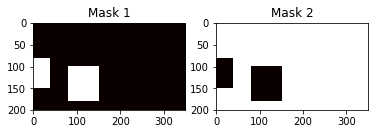

In [12]:
plt.figure(2)
plt.subplot(121)
plt.imshow(np.transpose(squeeze(d_mask1)))
plt.title('Mask 1')
plt.subplot(122)
plt.imshow(np.transpose(squeeze(d_mask2)))
plt.title('Mask 2')
plt.show()


In [13]:
#%% Simulation in region/mask 1
O1=copy.deepcopy(O)
O1.delete_hard_data()
O1.par['mask_fnam']=mask_fnam1;
#O1.par['ti_fnam']=TI_filename1;
O1.ti=TI1
O1.run()


True

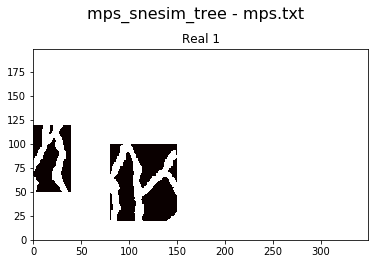

In [14]:
plt.figure(3)
O1.plot_reals()

In [15]:
d_hard = O1.hard_data_from_sim()

Number of non-nan data: 8400


In [16]:
d_hard = O1.hard_data_from_sim()
#%% SImulation in region/mask 2
O2=copy.deepcopy(O)
O2.parameter_filename='mps_mask2.par'
O2.par['mask_fnam']=mask_fnam2;
O2.ti=TI2
#O2.par['ti_fnam']=TI_filename2;
O2.delete_hard_data()
O2.d_hard = d_hard
O2.run()


Number of non-nan data: 8400


True

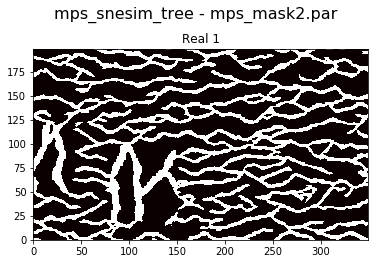

In [17]:
plt.figure(4)
O2.plot_reals()